In [195]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['label'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [142]:
data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-2]
X = data[:,0:ncol-2]

In [143]:
y = y.astype(int)

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=3)

In [146]:
y_prede = []
y_teste = []
taxa_de_acerto = []
for i in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
    y_teste.append(y_test)
    clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    score = accuracy_score(p, y_test)
    taxa_de_acerto.append(score)
    print('Accuracy:', score)
    y_prede.append(p)

Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Accuracy: 1.0


In [147]:
def geclosest(value, lista):
    array = np.array(lista)
    index = np.argmin(abs(array - value))
    return index

In [148]:
media = np.mean(taxa_de_acerto)
representante = geclosest(media, taxa_de_acerto)
print(media)

0.9649999999999999


In [149]:
representante = geclosest(media, taxa_de_acerto)

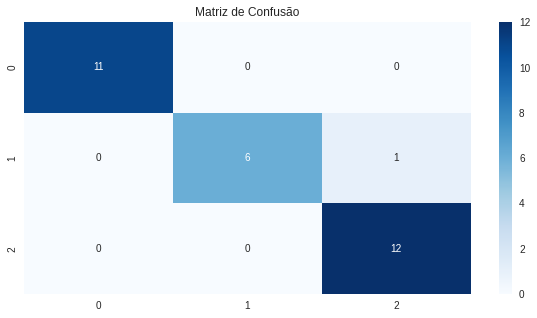

In [150]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_teste[representante], y_prede[representante])
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;

1.0

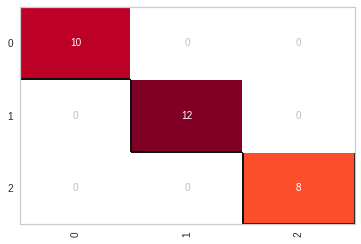

In [151]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [152]:
print(classification_report(y_teste[representante], y_prede[representante]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [153]:
from matplotlib.colors import ListedColormap

def make_plot(classifier,title,data,data_labels,labels):
    step = .02
    cmap_base = ListedColormap(['lightcoral', 'cornflowerblue', 'bisque'])
    cmap_labels = ['red', 'blue', 'orange']

   
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),np.arange(y_min, y_max, step))

    Z = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()]))
    for i in range(len(np.unique(Z))):
        Z[np.where(Z == np.unique(Z)[i])] = str(i)
    Z = Z.astype(int)
    Z = Z.reshape(xx.shape)


    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_base)

    
    
    for i in range(len(labels)):
        plt.scatter(data[data_labels == labels[i], 0], data[data_labels == labels[i], 1],
                    facecolor=cmap_labels[i], label=labels[i],alpha=0.6, edgecolor="black")
    
    plt.legend()

    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(title)

    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

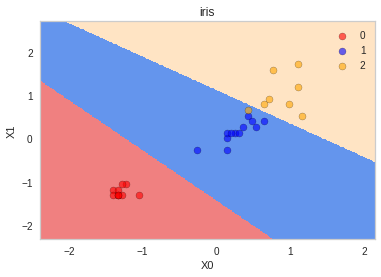

In [154]:
from sklearn.model_selection import train_test_split
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
#clf.fit(X_train, y_train)
clf.fit(X_train[:,[2,3]], y_train)
#predictions = nb.predict(X_test)
make_plot(clf ,'iris',X_test[:,[2,3]],y_test,np.unique(y_test))

In [155]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.target[[10, 50, 85]]
list(cancer.target_names)

['malignant', 'benign']

In [156]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df['target_names'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [157]:
classes = pd.unique(df.iloc[:,-1])
data = df.values
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=3)

In [159]:
y_prede = []
y_teste = []
taxa_de_acerto = []
for i in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
    y_teste.append(y_test)
    clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    score = accuracy_score(p, y_test)
    taxa_de_acerto.append(score)
    print('Accuracy:', score)
    y_prede.append(p)

Accuracy: 0.956140350877193
Accuracy: 0.9912280701754386
Accuracy: 0.9824561403508771
Accuracy: 0.9912280701754386
Accuracy: 0.9736842105263158
Accuracy: 0.956140350877193
Accuracy: 0.956140350877193
Accuracy: 0.956140350877193
Accuracy: 0.9912280701754386
Accuracy: 0.9736842105263158
Accuracy: 0.9824561403508771
Accuracy: 0.9385964912280702
Accuracy: 0.9912280701754386
Accuracy: 0.9824561403508771
Accuracy: 1.0
Accuracy: 0.9385964912280702
Accuracy: 0.9736842105263158
Accuracy: 0.9649122807017544
Accuracy: 0.9649122807017544
Accuracy: 0.9824561403508771


In [160]:
media = np.mean(taxa_de_acerto)
representante = geclosest(media, taxa_de_acerto)
print(media)

0.9723684210526315


In [161]:
representante = geclosest(media, taxa_de_acerto)

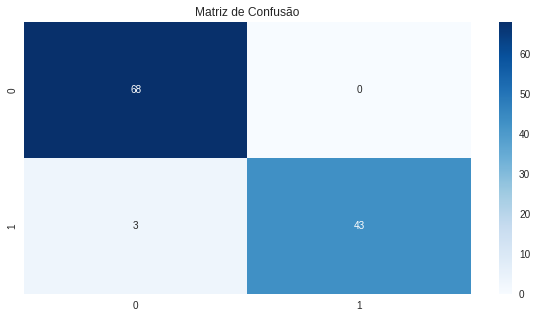

In [162]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_teste[representante], y_prede[representante])
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;

0.9824561403508771

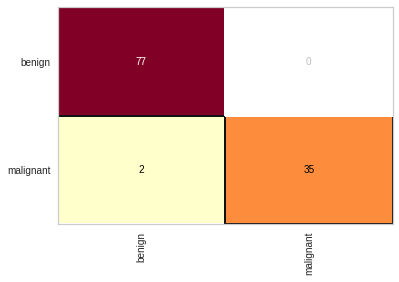

In [163]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [164]:
print(classification_report(y_teste[representante], y_prede[representante]))

              precision    recall  f1-score   support

      benign       0.96      1.00      0.98        68
   malignant       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



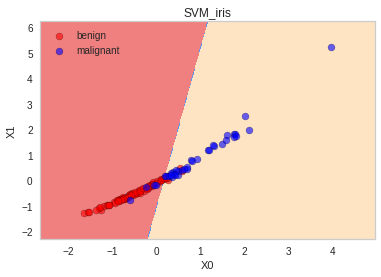

In [165]:
from sklearn.model_selection import train_test_split
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
#clf.fit(X_train, y_train)
clf.fit(X_train[:,[2,3]], y_train)
#predictions = nb.predict(X_test)
make_plot(clf ,'SVM_iris',X_test[:,[2,3]],y_test,np.unique(y_test))

In [166]:
!wget -q 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip' -O 'column_data.zip'
!unzip  'column_data.zip' -d '.'

^C
Archive:  column_data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of column_data.zip or
        column_data.zip.zip, and cannot find column_data.zip.ZIP, period.


In [168]:
coluna = pd.read_csv('column_2C.dat', sep = ' ',  header=None)
coluna

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [169]:
data = coluna.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [171]:
y_prede = []
y_teste = []
taxa_de_acerto = []
for i in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
    y_teste.append(y_test)
    clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
    clf.fit(X_train, y_train)
    p = clf.predict(X_test)
    score = accuracy_score(p, y_test)
    taxa_de_acerto.append(score)
    print('Accuracy:', score)
    y_prede.append(p)

Accuracy: 0.9193548387096774
Accuracy: 0.8064516129032258
Accuracy: 0.8548387096774194
Accuracy: 0.8548387096774194
Accuracy: 0.8387096774193549
Accuracy: 0.8709677419354839
Accuracy: 0.8709677419354839
Accuracy: 0.8064516129032258
Accuracy: 0.7419354838709677
Accuracy: 0.8709677419354839
Accuracy: 0.8225806451612904
Accuracy: 0.8387096774193549
Accuracy: 0.8870967741935484
Accuracy: 0.9193548387096774
Accuracy: 0.8387096774193549
Accuracy: 0.967741935483871
Accuracy: 0.8225806451612904
Accuracy: 0.8387096774193549
Accuracy: 0.9032258064516129
Accuracy: 0.8870967741935484


In [172]:
media = np.mean(taxa_de_acerto)
representante = geclosest(media, taxa_de_acerto)
print(media)

0.8580645161290322


In [173]:
representante = geclosest(media, taxa_de_acerto)

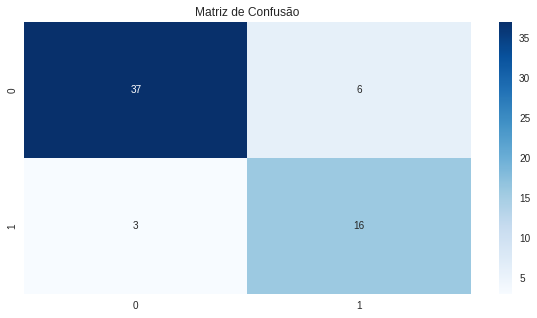

In [174]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_teste[representante], y_prede[representante])
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;

0.8870967741935484

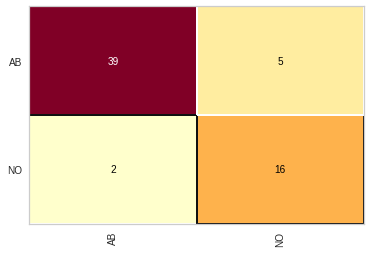

In [175]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [176]:
print(classification_report(y_teste[representante], y_prede[representante]))

              precision    recall  f1-score   support

          AB       0.93      0.86      0.89        43
          NO       0.73      0.84      0.78        19

    accuracy                           0.85        62
   macro avg       0.83      0.85      0.84        62
weighted avg       0.86      0.85      0.86        62



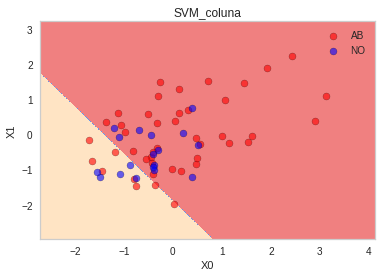

In [194]:
from sklearn.model_selection import train_test_split
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
clf.fit(X_train[:,[1,2]], y_train)
make_plot(clf ,'SVM_coluna',X_test[:,[1,2]],y_test,np.unique(y_test))